# **CODSOFT INTERNSHIP**

TASK - 1 : Titanic Survival Prediction

Author : Kumar Patil

Domain : Data Science

Batch : January 1

Aim:To build a model that predicts whether a
 passenger on the Titanic survived or not.

# **AIM**

The aim of the Titanic Survival Prediction project using data science is to develop a predictive model that accurately predicts the survival chances of passengers aboard the Titanic based on various features such as age, gender, passenger class, and others. By applying machine learning algorithms, data preprocessing, and feature engineering, this project seeks to analyze and understand the factors contributing to survival rates, and provide insights into the patterns and trends that affected survival outcomes during the Titanic disaster. The ultimate goal is to create a reliable classification model that can predict the likelihood of survival for new, unseen data.
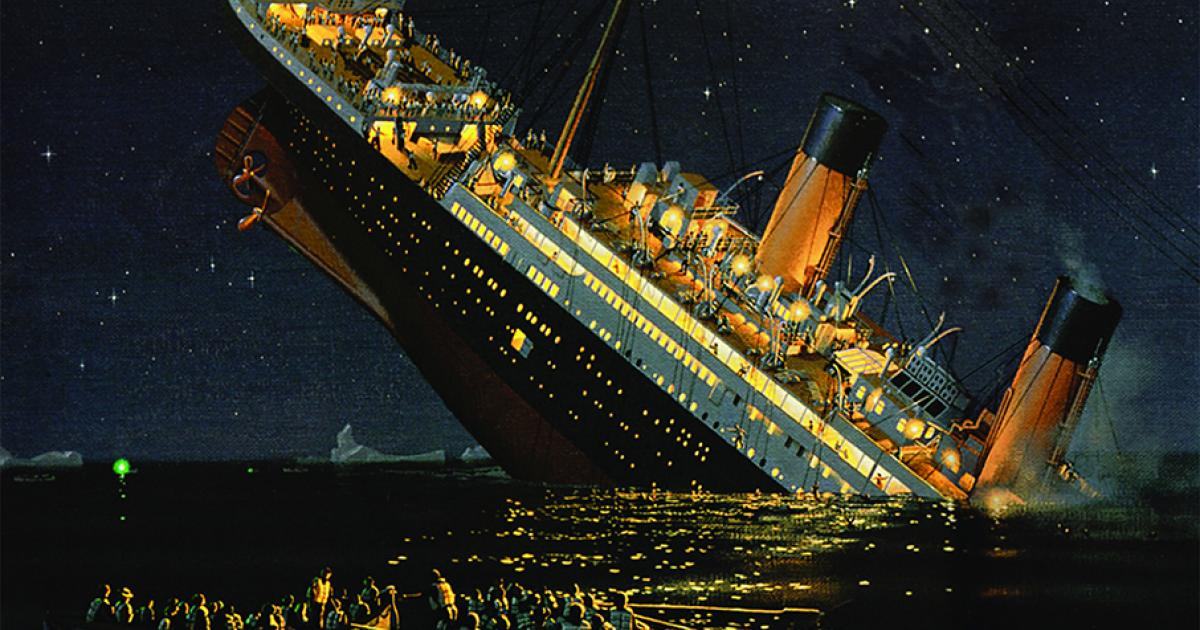

 **Importing Important Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing Datset**

In [2]:
df = pd.read_csv("/content/archive.zip")


**Display the first few rows of the datset.**

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**From above cell it is clear that there are few missing values in age column.**

In [7]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [8]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

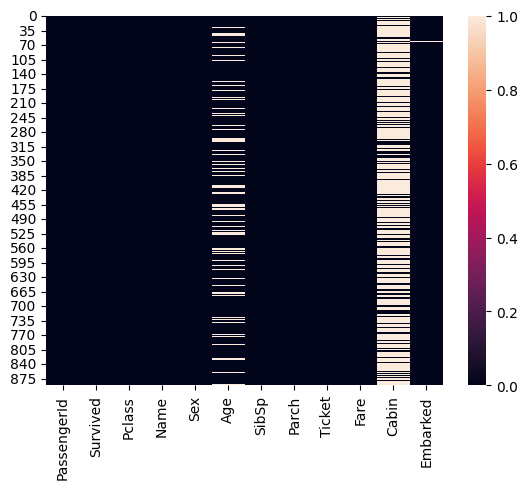

In [11]:
# Let's visualize the missing values using heatmap
sns.heatmap(df.isnull())

In [12]:
# Let's Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [22]:
df.drop(['Embarked_C'],axis=1, inplace=True)

In [24]:
df.drop(['Embarked_Q'],axis=1, inplace=True)

In [25]:
df.drop(['Embarked_S'],axis=1, inplace=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN


In [27]:
# Let's Drop the 'Cabin' column due to many missing values
df.drop('Cabin', axis=1, inplace=True)

In [28]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Exploratory Data Analysis (EDA)**

In [29]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<ipython-input-31-acde9cfda273>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette=['#d62728','#2ca02c'])


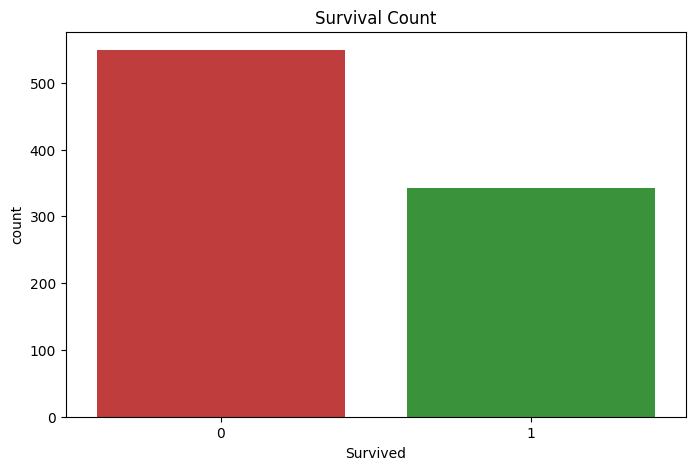

In [31]:
# prompt: plt.figure(figsize=(8, 5))
# sns.countplot(df=df, x='Survived', palette=['#d62728','#2ca02c'])
# plt.title("Survival Count")
# plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived', palette=['#d62728','#2ca02c'])
plt.title("Survival Count")
plt.show()

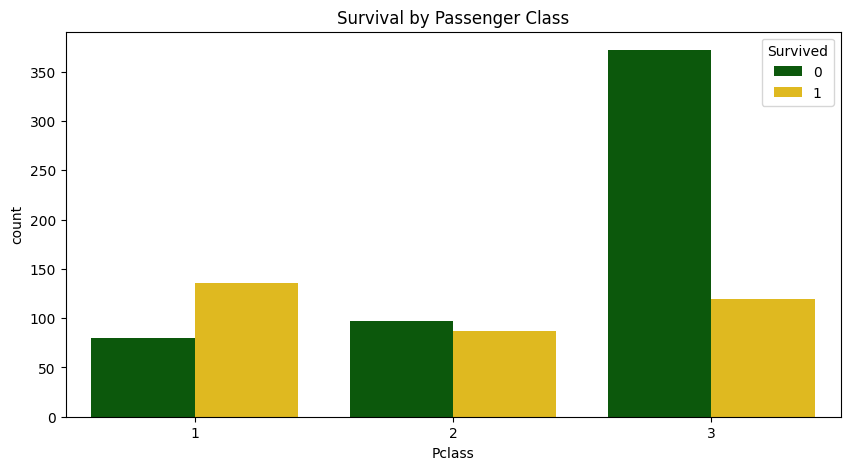

In [32]:
#let's visualize the count of survivals wrt pclass
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Pclass', hue='Survived', palette=['#006400', '#FFCC00'])
plt.title("Survival by Passenger Class")
plt.show()

In [33]:
df["Sex"]

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


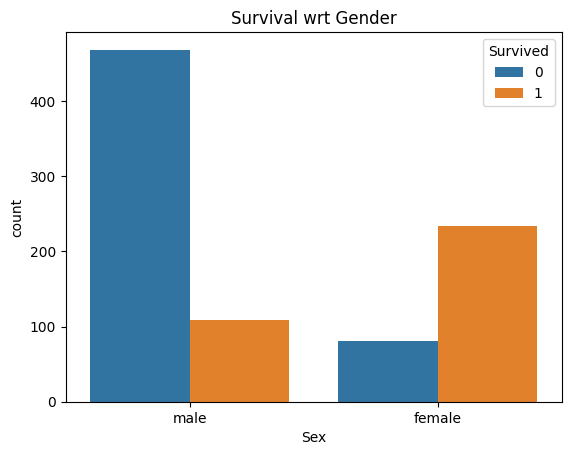

In [34]:
#let's visualize the count of survivals wrt Gender
sns.countplot(x=df['Sex'], hue=df['Survived'])
plt.title("Survival wrt Gender")
plt.show()

In [35]:
#Look at survival rate by sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [36]:

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [37]:
#Splitting the data
Y= df.Survived.copy()
X= df.drop(['Survived'], axis = 1)

In [38]:

X.drop(['Cabin','Ticket', 'Name', 'PassengerId'], axis=1, inplace=True, errors='ignore')

In [39]:
X.isnull().sum()

,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


In [ ]:
# prompt: # As per prior result we have null values in the Age Component, we are replacing the null values with mean
X.Age.fillna(X.Age.mean(), inplace=True)

In [42]:
# Checking any null values present
X.isnull().values.any()

False

Model Training

In [43]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
#Spliting the data to train our model and test its accuracy
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state=7)

In [46]:
#Import Regression libraries for Model buliding
from sklearn.linear_model import LogisticRegression

#Initialize it to a name
model = LogisticRegression()

In [47]:
X_train.dropna(inplace=True)
Y_train = Y_train[X_train.index]  # Ensure target variable is aligned after dropping rows

In [49]:
print(X_train.shape)
print(Y_train.shape)

(712, 6)
(712,)


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(Y_train.shape)

(712, 6)
(712,)


In [51]:
# Check the shape of X_test and Y_test
print("Shape of X_test:", X_test.shape)  # This should return (n_samples, n_features)
print("Shape of Y_test:", Y_test.shape)  # This should match the number of rows in X_test

Shape of X_test: (179, 6)
Shape of Y_test: (179,)


In [53]:
from sklearn.model_selection import train_test_split

# Make sure X and Y are properly defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Confirm that X_test is not empty
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (712, 6)
Shape of X_test: (179, 6)


In [54]:
# Check for missing values in X_test
print(X_test.isnull().sum())  # Shows how many missing values are in each column

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


In [55]:
#Import Regression libraries for Model buliding
from sklearn.linear_model import LogisticRegression

#Initialize it to a name
model = LogisticRegression()

In [56]:
#Fitting our data to the model
model.fit(X_train,Y_train)

LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [57]:
model.score(X_train,Y_train)

0.800561797752809

In [58]:
# Predict on the model
Y_pred_test= model.predict(X_test)
Y_pred_test

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [59]:
#Import Metrics to Check Accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_test)))

Model accuracy score: 0.8101


In [60]:

test_passenger_ids = [1,2,3] # Replace with actual passenger IDs from test data
test_predictions = [0, 1, 0] # Replace with actual predictions from your model

submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.
